In [3]:
import json
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_json('ultimate_data_challenge.json')
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


For context, below is the prompt.

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long­term rider retention (again, a few sentences will suffice).


In [5]:
#Before we go any further let's check for any missing values
df.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [6]:
df.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [7]:
df.count()

city                      50000
trips_in_first_30_days    50000
signup_date               50000
avg_rating_of_driver      41878
avg_surge                 50000
last_trip_date            50000
phone                     49604
surge_pct                 50000
ultimate_black_user       50000
weekday_pct               50000
avg_dist                  50000
avg_rating_by_driver      49799
dtype: int64

okay so we have to handle these missing values. As per a reccomendation, I will go ahead and fill these values in with the median in the avg_rating case and I'll list 'unknown' in the phone section. As for the average rating, I will go ahead and create columns that signify whether that column was filled in by us or not. Might as well do it for the device as well can't hurt.


In [8]:
null_columns = ['avg_rating_of_driver', 'phone', 'avg_rating_by_driver']

for col in null_columns:
    new_col = col +'_isnull'
    df[new_col] = df[col].isnull()
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,avg_rating_of_driver_isnull,phone_isnull,avg_rating_by_driver_isnull
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,False,False,False
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False,False,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False,False,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,False,False,False
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False,False,False


In [9]:
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(value = df['avg_rating_by_driver'].median())
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(value = df['avg_rating_of_driver'].median())
df['phone'] = df['phone'].fillna(value='unknown')

In [10]:
df.isna().sum() #perfect

city                           0
trips_in_first_30_days         0
signup_date                    0
avg_rating_of_driver           0
avg_surge                      0
last_trip_date                 0
phone                          0
surge_pct                      0
ultimate_black_user            0
weekday_pct                    0
avg_dist                       0
avg_rating_by_driver           0
avg_rating_of_driver_isnull    0
phone_isnull                   0
avg_rating_by_driver_isnull    0
dtype: int64

In [11]:
#I suppose it would be a good idea to see some of the values regarding the columns, so I'm going to iterate with value_counts

for i in df.columns:
    print(i)
    print(df[i].value_counts().sort_index())

city
Astapor           16534
King's Landing    10130
Winterfell        23336
Name: city, dtype: int64
trips_in_first_30_days
0      15390
1      14108
2       7402
3       3788
4       2562
5       1616
6       1134
7        819
8        589
9        471
10       349
11       301
12       221
13       168
14       147
15       155
16       108
17       113
18        80
19        69
20        51
21        40
22        34
23        45
24        33
25        20
26        19
27        28
28        21
29         9
30        15
31         6
32         8
33         9
34        11
35         2
36         3
37         9
38         4
39         3
40         5
41         1
42         3
43         4
44         5
47         3
48         2
49         2
50         1
51         1
53         2
54         2
55         2
56         2
58         1
63         1
71         1
73         1
125        1
Name: trips_in_first_30_days, dtype: int64
signup_date
2014-01-01    1737
2014-01-02    1004
2014-01-03    1

Next we'll be looking for the retained users and grabbing all of the ones that have used the service in the past 30 days (30 days preceding the collection of this data). According the value counts above, we see that the final day before collection was 07-01-2014. So we will go 30 days before this date.

In [12]:
#we could use like a timedelta here, but I think it's easiest if we just gather all of the dates after 06-01-2014
retained = df['last_trip_date'] > '2014-06-01'
retained.value_counts()

False    31690
True     18310
Name: last_trip_date, dtype: int64

In [13]:
print("Retained Percentage: " + str(round(18310/50000, 3)))

Retained Percentage: 0.366


Next is to start building the predictive model. Before we do that we have to adjust some of the columns so that they will be understood by the machine learning algorithm.

In [14]:
#going to create a copy of this edited dataframe.
df_backup = df.copy()

In [15]:
#after giving it some thought, it would be best to split the date features into more basic components, day, month, year(even though year is only 2014)
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [16]:
df['signup_year'] = df['signup_date'].dt.year #we can always drop the year later
df['signup_month'] = df['signup_date'].dt.month
df['signup_day'] = df['signup_date'].dt.day

In [17]:
df['last_trip_year'] = df['last_trip_date'].dt.year
df['last_trip_month'] = df['last_trip_date'].dt.month
df['last_trip_day'] = df['last_trip_date'].dt.day

In [18]:
#now the the date features are split, we can drop the originals
df.drop(columns = ['last_trip_date', 'signup_date'], inplace = True)
df.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,avg_rating_of_driver_isnull,phone_isnull,avg_rating_by_driver_isnull,signup_year,signup_month,signup_day,last_trip_year,last_trip_month,last_trip_day
0,King's Landing,4,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,False,False,False,2014,1,25,2014,6,17
1,Astapor,0,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,False,False,False,2014,1,29,2014,5,5
2,Astapor,3,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,False,False,False,2014,1,6,2014,1,7
3,King's Landing,9,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,False,False,False,2014,1,10,2014,6,29
4,Winterfell,14,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,False,False,False,2014,1,27,2014,3,15


In [19]:
#now it's time for preprocessing and standardization (yay), let's make another copy of the dataframe for safekeeping
df_simplified = df.copy()

In [20]:
#let's begin with the categorical data, city and phone
#May need to do the 'isnulls' and ultimate black. But they may be better as 0's and 1's
df = pd.get_dummies(df, columns = ['city', 'phone'])
df.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,avg_rating_of_driver_isnull,phone_isnull,...,signup_day,last_trip_year,last_trip_month,last_trip_day,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,phone_unknown
0,4,4.7,1.10,15.4,True,46.2,3.67,5.0,False,False,...,25,2014,6,17,0,1,0,0,1,0
1,0,5.0,1.00,0.0,False,50.0,8.26,5.0,False,False,...,29,2014,5,5,1,0,0,1,0,0
2,3,4.3,1.00,0.0,False,100.0,0.77,5.0,False,False,...,6,2014,1,7,1,0,0,0,1,0
3,9,4.6,1.14,20.0,True,80.0,2.36,4.9,False,False,...,10,2014,6,29,0,1,0,0,1,0
4,14,4.4,1.19,11.8,False,82.4,3.13,4.9,False,False,...,27,2014,3,15,0,0,1,1,0,0


Before I go messing with the data too much, now may be a good time to create some visualizations of the features. This is a little bit easier to look at for insight.

In [21]:
#target encoding ultimate black user
df['ultimate_black_user'].loc[df['ultimate_black_user'] == True] = 1
df['ultimate_black_user'].loc[df['ultimate_black_user'] == False] = 0

C:\Users\elyse\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [22]:
#Before I forget, let's add the 'retained' column
df['retained'] = retained
#and also create two copies of the dataframe, one of retained, one of not
df_r = df.loc[df['retained'] == True]
df_l = df.loc[df['retained'] == False]
df.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,avg_rating_of_driver_isnull,phone_isnull,...,last_trip_year,last_trip_month,last_trip_day,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,phone_unknown,retained
0,4,4.7,1.10,15.4,1,46.2,3.67,5.0,False,False,...,2014,6,17,0,1,0,0,1,0,True
1,0,5.0,1.00,0.0,0,50.0,8.26,5.0,False,False,...,2014,5,5,1,0,0,1,0,0,False
2,3,4.3,1.00,0.0,0,100.0,0.77,5.0,False,False,...,2014,1,7,1,0,0,0,1,0,False
3,9,4.6,1.14,20.0,1,80.0,2.36,4.9,False,False,...,2014,6,29,0,1,0,0,1,0,True
4,14,4.4,1.19,11.8,0,82.4,3.13,4.9,False,False,...,2014,3,15,0,0,1,1,0,0,False


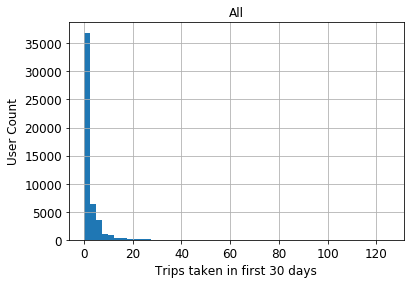

In [23]:
#Trips in 1st 30 day - total
df['trips_in_first_30_days'].hist(bins = 50, grid=True, xlabelsize=12, ylabelsize=12)
plt.title("All")
plt.xlabel("Trips taken in first 30 days", fontsize=12)
plt.ylabel("User Count", fontsize=12)
plt.show()

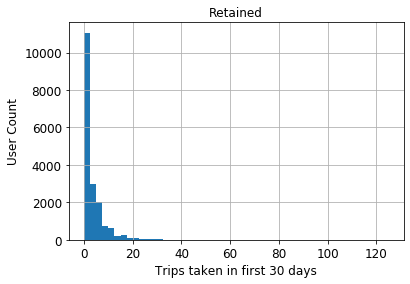

In [24]:
df_r['trips_in_first_30_days'].hist(bins = 50, grid=True, xlabelsize=12, ylabelsize=12)
plt.title("Retained")
plt.xlabel("Trips taken in first 30 days", fontsize=12)
plt.ylabel("User Count", fontsize=12)
plt.show()

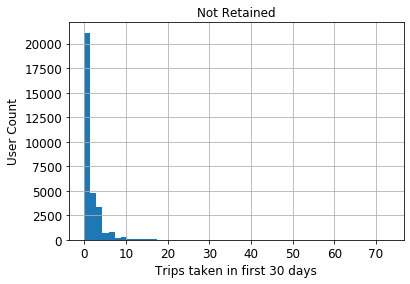

In [25]:
df_l['trips_in_first_30_days'].hist(bins = 50, grid=True, xlabelsize=12, ylabelsize=12)
plt.title("Not Retained")
plt.xlabel("Trips taken in first 30 days", fontsize=12)
plt.ylabel("User Count", fontsize=12)
plt.show()

Seems like a lot of users only have less than 5 trips taken or 0. But there is a slight correlation to retained users having a few more trips taken, as we can see with the small bar at the 20 + mark in the "retained" section. Moving forward I am going to skip the "All" graph, I don't see this using our space correctly.

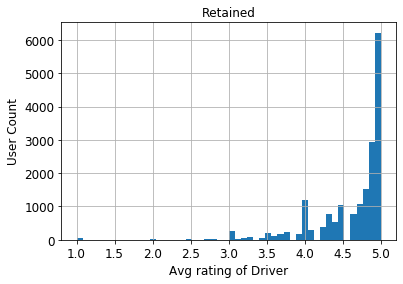

In [26]:
#Avg rating of driver
df_r['avg_rating_of_driver'].hist(bins=50, grid=True, xlabelsize=12, ylabelsize=12)
plt.title('Retained')
plt.xlabel("Avg rating of Driver", fontsize=12)
plt.ylabel("User Count", fontsize=12)
plt.show()

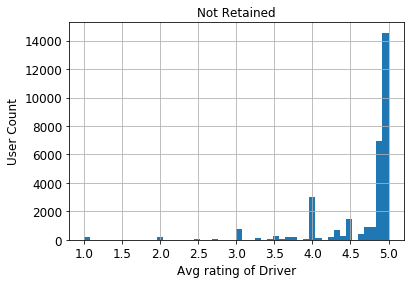

In [27]:
df_l['avg_rating_of_driver'].hist(bins=50, grid=True, xlabelsize=12, ylabelsize=12)
plt.title('Not Retained')
plt.xlabel("Avg rating of Driver", fontsize=12)
plt.ylabel("User Count", fontsize=12)
plt.show()

Nothing remarkable to see here, not from what I can gather

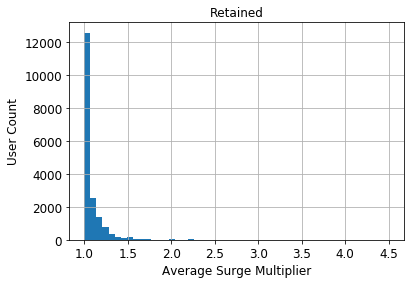

In [28]:
df_r['avg_surge'].hist(bins=50, grid=True, xlabelsize=12, ylabelsize=12)
plt.title("Retained")
plt.xlabel("Average Surge Multiplier", fontsize=12)
plt.ylabel("User Count", fontsize=12)
plt.show()

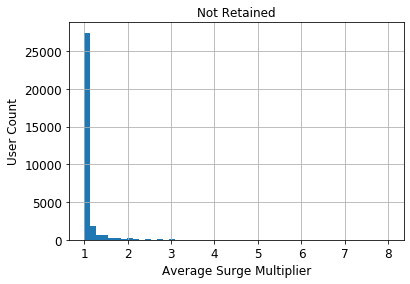

In [29]:
df_l['avg_surge'].hist(bins=50, grid=True, xlabelsize=12, ylabelsize=12)
plt.title("Not Retained")
plt.xlabel("Average Surge Multiplier", fontsize=12)
plt.ylabel("User Count", fontsize=12)
plt.show()

It seems like users that are retained have made better use of the surge mechanic of the application

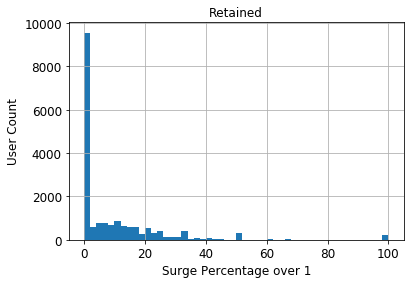

In [30]:
df_r['surge_pct'].hist(bins=50, grid=True, xlabelsize=12, ylabelsize=12)
plt.title("Retained")
plt.xlabel("Surge Percentage over 1", fontsize=12)
plt.ylabel("User Count", fontsize=12)
plt.show()

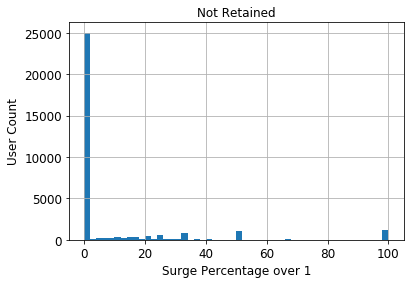

In [31]:
df_l['surge_pct'].hist(bins=50, grid=True, xlabelsize=12, ylabelsize=12)
plt.title("Not Retained")
plt.xlabel("Surge Percentage over 1", fontsize=12)
plt.ylabel("User Count", fontsize=12)
plt.show()

Reinforces our previous finding, the retained users seem to have more frequent use of the surge mechanic

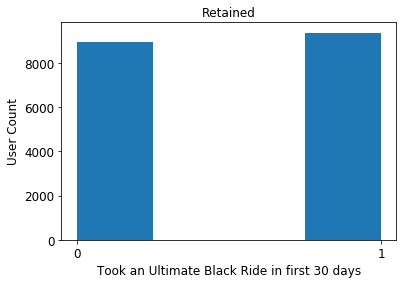

In [32]:
#let's try using a different type of hist for this binary ultimate_black viz
#tried using the df as is, but as I figured earlier, i'll have to 0-1 this
#went ahead and added it before the split into retained and not retained, then returned to this cell
df_r['ultimate_black_user'].hist(bins=4, grid=False, xlabelsize=12, ylabelsize=12)
plt.title("Retained")
plt.xticks([0,1])
plt.xlabel("Took an Ultimate Black Ride in first 30 days", fontsize=12)
plt.ylabel("User Count", fontsize=12)
plt.show()

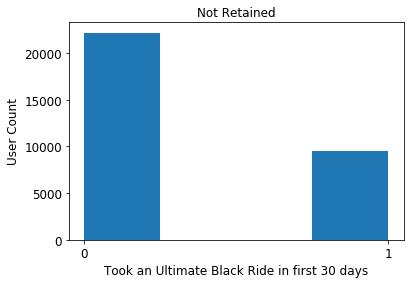

In [33]:
df_l['ultimate_black_user'].hist(bins=4, grid=False, xlabelsize=12, ylabelsize=12)
plt.title("Not Retained")
plt.xticks([0,1])
plt.xlabel("Took an Ultimate Black Ride in first 30 days", fontsize=12)
plt.ylabel("User Count", fontsize=12)
plt.show()

Okay! So this in combination with the 'surge' feature, seems like the users that get retained have been more perceptive to the features of the app.

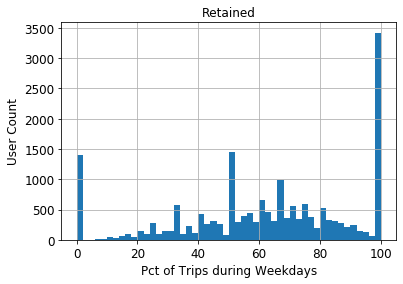

In [34]:
df_r['weekday_pct'].hist(bins=50, grid=True, xlabelsize=12, ylabelsize=12)
plt.title("Retained")
plt.xlabel("Pct of Trips during Weekdays", fontsize=12)
plt.ylabel("User Count", fontsize=12)
plt.show()

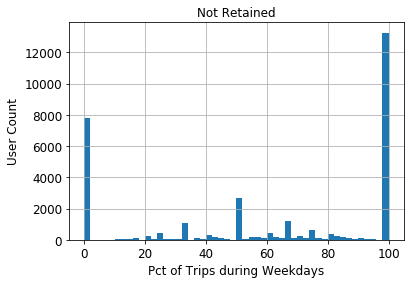

In [35]:
df_l['weekday_pct'].hist(bins=50, grid=True, xlabelsize=12, ylabelsize=12)
plt.title("Not Retained")
plt.xlabel("Pct of Trips during Weekdays", fontsize=12)
plt.ylabel("User Count", fontsize=12)
plt.show()

It's interesting to see that the spikes from both groups are at the same or similar areas. But this is a bit inconclusive.

In [36]:
df.columns #just a reference for me and what is next

Index(['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'avg_rating_of_driver_isnull', 'phone_isnull',
       'avg_rating_by_driver_isnull', 'signup_year', 'signup_month',
       'signup_day', 'last_trip_year', 'last_trip_month', 'last_trip_day',
       'city_Astapor', 'city_King's Landing', 'city_Winterfell',
       'phone_Android', 'phone_iPhone', 'phone_unknown', 'retained'],
      dtype='object')

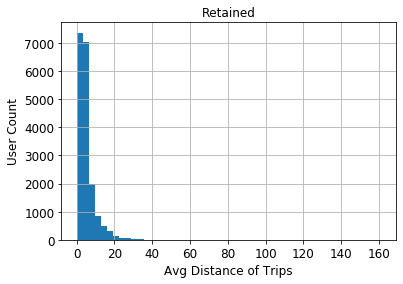

In [37]:
df_r['avg_dist'].hist(bins=50, grid=True, xlabelsize=12, ylabelsize=12)
plt.title("Retained")
plt.xlabel("Avg Distance of Trips", fontsize=12)
plt.ylabel("User Count", fontsize=12)
plt.show()

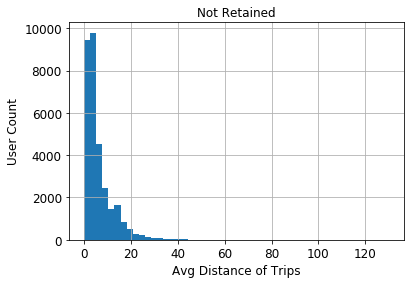

In [38]:
df_l['avg_dist'].hist(bins=50, grid=True, xlabelsize=12, ylabelsize=12)
plt.title("Not Retained")
plt.xlabel("Avg Distance of Trips", fontsize=12)
plt.ylabel("User Count", fontsize=12)
plt.show()

Similar trends, nothing to see here.

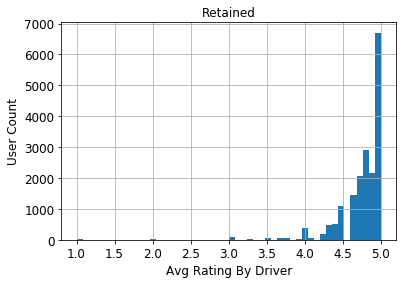

In [39]:
df_r['avg_rating_by_driver'].hist(bins=50, grid=True, xlabelsize=12, ylabelsize=12)
plt.title("Retained")
plt.xlabel("Avg Rating By Driver", fontsize=12)
plt.ylabel("User Count", fontsize=12)
plt.show()

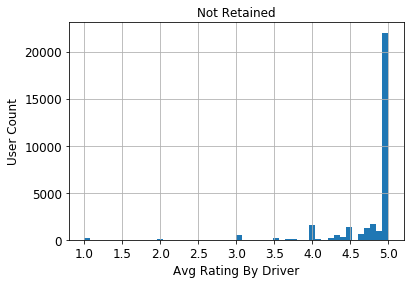

In [40]:
df_l['avg_rating_by_driver'].hist(bins=50, grid=True, xlabelsize=12, ylabelsize=12)
plt.title("Not Retained")
plt.xlabel("Avg Rating By Driver", fontsize=12)
plt.ylabel("User Count", fontsize=12)
plt.show()

In [41]:
#going to look at the cities, by numbers only
df_simplified['retained'] = retained
df_simplified['city'].loc[df['retained'] == True].value_counts()


Winterfell        7981
King's Landing    6307
Astapor           4022
Name: city, dtype: int64

In [42]:
df_simplified['city'].loc[df['retained'] == False].value_counts()

Winterfell        15355
Astapor           12512
King's Landing     3823
Name: city, dtype: int64

I would like to see this side by side

In [55]:
#creating a dict to hold these values
city_dict = {}
city_dict['Winterfell_r'] = 7981
city_dict['Winterfell_l'] = 15355
city_dict['Kings_Landing_r'] = 6307
city_dict['Kings_Landing_l'] = 3823
city_dict['Astapor_r'] = 4022
city_dict['Astapor_l'] = 12512

city_df = pd.DataFrame.from_dict(city_dict, orient = 'index', columns = ['users'])
city_df.head(6)

,users
Winterfell_r,7981
Winterfell_l,15355
Kings_Landing_r,6307
Kings_Landing_l,3823
Astapor_r,4022
Astapor_l,12512


in terms of user retainability, it looks as though astapor has the hardest time, not by much, but by a meaning full. The other two cities of Winterfell and Kings Landing have an approximate retainability of 50%, therefore there must be something in Astapor, perhaps competition or less reason to use a transportation service, that is causing the weakness.

In [57]:
#now we'll look at phone types
df_simplified['phone'].loc[df['retained'] == True].value_counts()

iPhone     15238
Android     2942
unknown      130
Name: phone, dtype: int64

In [59]:
df_simplified['phone'].loc[df['retained'] == False].value_counts()

iPhone     19344
Android    12080
unknown      266
Name: phone, dtype: int64

I did not expect there to be such a discrepancy between the two types. But it looks like here that the retained users are dominated by iphone handlers. This is interesting, there may be a difference in the application, perhaps it is not as optimized for android which causes frustration, or android users are more heavily marketed by a different transportation company

## Predictative Modelling

Are goal here is to see if we can determine if a user will be retained user after six months. I would like to create an open model, meaning that we can see which features are having the biggest impression on the target variable.
Let's get started.

In [60]:
#looking at the comparison again
df['retained'].value_counts()

False    31690
True     18310
Name: retained, dtype: int64

In [61]:
#need to turn this into 0's and 1's
df['retained'].loc[df['retained'] == True] = 1
df['retained'].loc[df['retained'] == False] = 0
df['retained'].value_counts()


C:\Users\elyse\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0    31690
1    18310
Name: retained, dtype: int64

In [65]:
#We do not need signups, or last trips. These numbers will simply be throwing off the algorithm because of how we are getting retention

df.drop(columns = ['signup_year', 'signup_month', 'signup_day','last_trip_month', 'last_trip_year','last_trip_day'], inplace = True)

In [66]:
df.columns

Index(['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'avg_rating_of_driver_isnull', 'phone_isnull',
       'avg_rating_by_driver_isnull', 'city_Astapor', 'city_King's Landing',
       'city_Winterfell', 'phone_Android', 'phone_iPhone', 'phone_unknown',
       'retained'],
      dtype='object')

In [68]:
#we can also drop the isnulls now I do not see them being important features
df.drop(columns = ['avg_rating_of_driver_isnull', 'avg_rating_by_driver_isnull'], inplace = True)
df.columns

Index(['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'phone_isnull', 'city_Astapor',
       'city_King's Landing', 'city_Winterfell', 'phone_Android',
       'phone_iPhone', 'phone_unknown', 'retained'],
      dtype='object')

In [79]:
#forgot to drop phon_isnull
df.drop(columns = ['phone_isnull'], inplace = True)

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [88]:
df.dtypes

trips_in_first_30_days      int64
avg_rating_of_driver        int32
avg_surge                 float64
surge_pct                 float64
ultimate_black_user        object
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
city_Astapor                uint8
city_King's Landing         uint8
city_Winterfell             uint8
phone_Android               uint8
phone_iPhone                uint8
phone_unknown               uint8
retained                   object
dtype: object

In [97]:
#So I was running into some errors, it was reccomended that I turn the floats into ints where possible
#first make a copy
df_2 = df.copy()
def int_convert(df_col_list):
    for i in df_col_list:
        df[i] = df[i].astype('int')
int_convert(['avg_surge', 'surge_pct', 'weekday_pct', 'avg_dist','avg_rating_by_driver', 'avg_rating_of_driver', 'ultimate_black_user', 'retained'])

In [98]:
#splitting the data
X = df.drop(columns = ['retained'])
y = df['retained']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.3, random_state = 44)

In [106]:
LogReg = LogisticRegression(penalty='l2', C=0.001, solver='lbfgs', max_iter=1000, tol=0.001).fit(X_train, y_train)
logreg_pred = LogReg.predict(X_test)
print(logreg_pred[0:100])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


In [107]:
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.71      0.93      0.80     22119
           1       0.75      0.33      0.46     12881

    accuracy                           0.71     35000
   macro avg       0.73      0.63      0.63     35000
weighted avg       0.72      0.71      0.68     35000



okay so now that we are getting in motion here, we have a lot of room to tweak and test.

In [111]:
from sklearn.model_selection import GridSearchCV
parameters1 = {'tol' : (.001, .01), 'C' : (.01, .1, 1, 10, 100),'max_iter' : (1000, 10000)}
LogReg = LogisticRegression()
clf = GridSearchCV(LogReg, parameters1)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': (0.01, 0.1, 1, 10, 100),
                         'max_iter': (1000, 10000), 'tol': (0.001, 0.01)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [113]:
clf.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_max_iter', 'param_tol', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [119]:
clf_predict1 = clf.predict(X_test)

In [120]:
print(classification_report(clf_predict1, y_test))

              precision    recall  f1-score   support

           0       0.87      0.75      0.81     25477
           1       0.51      0.69      0.59      9523

    accuracy                           0.74     35000
   macro avg       0.69      0.72      0.70     35000
weighted avg       0.77      0.74      0.75     35000



In [121]:
clf.best_score_

0.7309333333333333

In [122]:
clf.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.001, verbose=0,
                   warm_start=False)

In [123]:
#I am a fan of random forests, let's see if how that algorithm handles this data
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
parameters_rfc = {'n_estimators' : (100, 1000), 'max_depth': (5, 10, 20, 30, None)} #simple, nothing crazy to see here
clf = GridSearchCV(rfc, parameters_rfc)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [124]:
clf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [125]:
clf.best_score_

0.7817999999999999

In [126]:
clf_predict2 = clf.predict(X_test)

In [128]:
print(classification_report(clf_predict2, y_test))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84     23823
           1       0.64      0.74      0.69     11177

    accuracy                           0.79     35000
   macro avg       0.76      0.77      0.76     35000
weighted avg       0.80      0.79      0.79     35000



We were able to improve the model using some basic random forest machine learning. While this is not perfect, the precision of 64 for 1 shows that we are able to determine an idea of what makes a user stick around. We should be able to dig deeper now.

In [129]:
from sklearn.metrics import roc_curve
y_pred_prob_clf_rfc = clf.predict_proba(X_test)[:,1]
print(y_pred_prob_clf_rfc)

[0.23598939 0.61399872 0.13459489 ... 0.03483623 0.11763107 0.88213753]


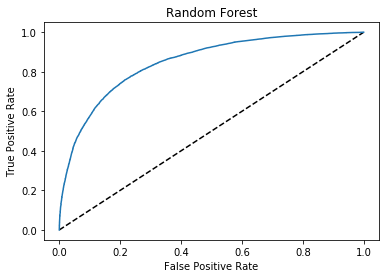

In [131]:
#setting up an ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_clf_rfc)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest')
plt.show();

In [133]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, y_pred_prob_clf_rfc)
print(auc_score)

0.8490754161807628


In [134]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

In [135]:
#setting up a precision - recall curve
clf_rfc_precision, clf_rfc_recall, _ = precision_recall_curve(y_test, y_pred_prob_clf_rfc)
clf_rfc_f1_score, clf_rfc_auc = f1_score(y_test, clf_predict2), auc(clf_rfc_recall, clf_rfc_precision)
print('Random Forest: f1=%.3f auc=%.3f' % (clf_rfc_f1_score, clf_rfc_auc))

Random Forest: f1=0.687 auc=0.773


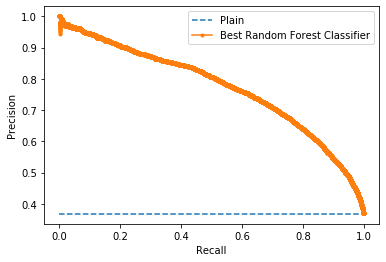

In [137]:
plain = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [plain, plain], linestyle='--', label='Plain')
plt.plot(clf_rfc_recall, clf_rfc_precision, marker='.', label='Best Random Forest Classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

While this is nice to look at, it doesn't answer what I set out for early on. I wanted to see which feature had the biggest impression on the model. So let's look at that now.

In [140]:
#first we need to actually run the random forest, because the clf doesn't have coefs
print(clf.best_params_)
print(clf.best_estimator_)

{'max_depth': 10, 'n_estimators': 1000}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [142]:
rfc2 =RandomForestClassifier(max_depth = 10, n_estimators = 1000)
rfc2.fit(X_train, y_train)
rfc2.feature_importances_

array([0.09102991, 0.02902327, 0.00375868, 0.15217398, 0.0626982 ,
       0.14799754, 0.06823274, 0.15442613, 0.03984489, 0.11914957,
       0.0246404 , 0.05680247, 0.04800734, 0.00221486])

In [144]:
rfc_fi = rfc2.feature_importances_
rfc_fi_series = pd.Series(rfc_fi, index=X_train.columns) 
print(rfc_fi_series)

trips_in_first_30_days    0.091030
avg_rating_of_driver      0.029023
avg_surge                 0.003759
surge_pct                 0.152174
ultimate_black_user       0.062698
weekday_pct               0.147998
avg_dist                  0.068233
avg_rating_by_driver      0.154426
city_Astapor              0.039845
city_King's Landing       0.119150
city_Winterfell           0.024640
phone_Android             0.056802
phone_iPhone              0.048007
phone_unknown             0.002215
dtype: float64


In [149]:
#just for ease of viewing, I'm going to increase these numbers
m = 1 / 0.154426
print(rfc_fi_series * m)


trips_in_first_30_days    0.589473
avg_rating_of_driver      0.187943
avg_surge                 0.024340
surge_pct                 0.985417
ultimate_black_user       0.406008
weekday_pct               0.958372
avg_dist                  0.441848
avg_rating_by_driver      1.000001
city_Astapor              0.258019
city_King's Landing       0.771564
city_Winterfell           0.159561
phone_Android             0.367830
phone_iPhone              0.310876
phone_unknown             0.014343
dtype: float64


Looking at this here and also knowing what we have seen from the visualization above we can determine some factors.
1. It looks like the avg_rating by driver has the highest impact to our Random Forest, if users are rated negatively, they are most likely less willing to use the applications.
2. We see here that the surge percentage shows that the user is paying attention to the promotion. So we can assume that the person has a growing investment with the app and they are utilizing it's features, which is a good sign for retention.
3. It looks like the third most influential feature to the model was whether the user used the app during the week. This would show whether or not the user grows a relationship with the application and the more they use it for day-to-day activities, the more likely they will stick around.
4. From our viz we also saw that the city and device type played a role, would mean that the company could try and increase marketing or appeal to the weaker city of Astapor and to android users.
5. We also see that users that had more trips in the first 30 days are just in fact likely to stick around. This could mean that they are satisfied enough with the app to repeat using it.

